In [1]:
import elastic
from elasticsearch import Elasticsearch
import datetime
import vibration
import datetime
import time
import matplotlib.image as mpimg
import numpy as np
import matplotlib.patches as mpatches

In [2]:
es = Elasticsearch(['192.168.20.32:9200'])
index = 'vibrations2018'

In [3]:
def query_elastic():
    query_body = {"sort": {
        "datetime": {
            "order": "asc"
        }
    },
         "query": {
            "range": {
                "datetime": {
                    "gte": int(first_date),
                    "lt": int(last_date)
                }
            }
        }
    }
    number_hits = es.search(index=index,
                            doc_type='txt',
                            size=0,
                            body=query_body)['hits']['total']
    elastic_results = es.search(index=index,
                                doc_type='txt',
                                size=10000,
                                body=query_body)
    return elastic_results

In [4]:
def get_results(elastic_results, component):
    result_list = list()
    for i in results['hits']['hits']:
        result_list.append(i['_source'][component])
    return result_list

In [5]:
from IPython.display import clear_output
from matplotlib import pyplot as plt
import collections
%matplotlib inline

def live_plot_rms(data_dict, figsize=(15,10), title=''):
    clear_output(wait=True)
    plt.figure(figsize=figsize)
    plt.plot(data_dict['x'], data_dict['data'], label='rms')
    plt.title(title)
    plt.grid(True)
    plt.xlabel('Time')
    plt.ylabel('Amplitude (mm/s)')
    plt.axis()
    plt.legend(loc='center left') # the plot evolves to the right
    plt.show();

In [6]:
def live_plot_fft(data_dict, figsize=(15,10), title='FFT'):
    clear_output(wait=True)
    plt.figure(figsize=figsize)
    plt.plot(data_dict['x'], data_dict['data'], label='fft')
    plt.title(title)
    plt.grid(True)
    plt.xlabel('frequency (Hz)')
    plt.ylabel('Amplitude (mm)')
    plt.xlim((50, 1000))
    plt.legend(loc='center left') # the plot evolves to the right
    plt.show();

In [ ]:
plot_list = list()
x_axis_list = list()
plot_data = dict()

while True:
    start = time.time()
    now = datetime.datetime.now() - datetime.timedelta(seconds=2)
    before = now - datetime.timedelta(seconds=1)
    last_date = datetime.datetime.strftime(now, '%y%m%d%H%M%S')
    first_date = datetime.datetime.strftime(before, '%y%m%d%H%M%S')
    results = query_elastic()
    result_list = get_results(results, 'X')
    
    if len(plot_list) <= 20:
        if len(result_list)!=0:
            plot_list += result_list
            if len(x_axis_list) == 0:
                x_axis_list += [1]
            else:
                x_axis_list += [x_axis_list[-1]+1]
    else:
        if len(result_list)!=0:
            plot_list = plot_list[1:] + result_list
            x_axis_list = x_axis_list[1:] + [x_axis_list[-1]+1]
    plot_data['data'] = plot_list
    plot_data['x'] = x_axis_list
    live_plot_rms(plot_data)
    time.sleep(1-(time.time()-start))

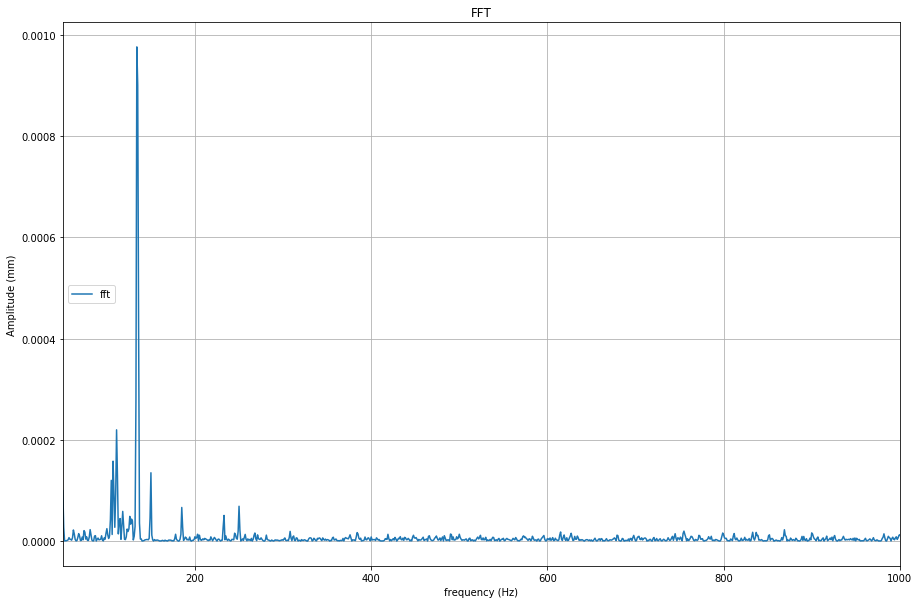

KeyboardInterrupt: 

In [12]:
plot_list = list()
x_axis_list = list()
plot_data = dict()

while True:
    start = time.time()
    now = datetime.datetime.strptime('181122112647','%y%m%d%H%M%S' )
    before = now - datetime.timedelta(seconds=2)
    last_date = datetime.datetime.strftime(now, '%y%m%d%H%M%S')
    first_date = datetime.datetime.strftime(before, '%y%m%d%H%M%S')
    results = query_elastic()
    result_list = get_results(results, 'Z')
    if result_list ==[]:
        pass
    else:
        plot_data['data'] = result_list[0][0][50:]

        plot_data['x'] = [i for i in range(len(result_list[0][0][50:]))]

        live_plot_fft(plot_data)
        time.sleep(1-(time.time()-start))
    

(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. ]),
 <a list of 9 Text yticklabel objects>)

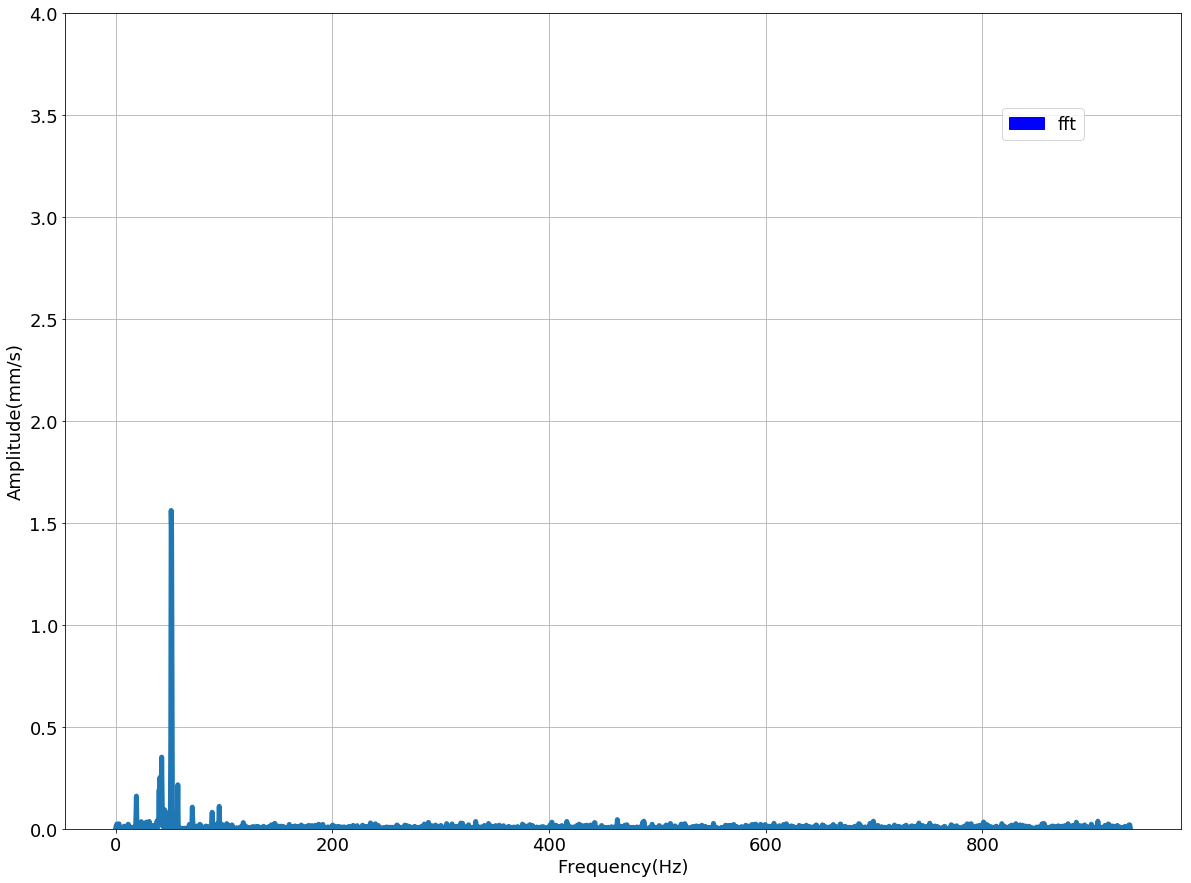

In [91]:
img = mpimg.imread(r'vibrationfft.png')
x = plt.figure(figsize=(20,15))
#imgplot = plt.imshow(img)
new_x = (937*np.array(plot_data['x'])/2450)#+76
new_y = (np.array(plot_data['data'])*1600)#+638*516/4
black_patch = mpatches.Patch(color='black', label='baseline')
blue_patch = mpatches.Patch(color='blue', label='fft')
data_ploted, = plt.plot(new_x,new_y, linewidth=5, label='fft')
plt.legend(handles=[blue_patch], fontsize='xx-large', loc=(0.84,1-0.155))
#plt.axis('off')
plt.grid()
plt.ylim(0,4)
plt.xlabel('Frequency(Hz)', fontsize=18)
plt.ylabel('Amplitude(mm/s)', fontsize=18)
plt.xticks(fontsize=18, rotation=0)
plt.yticks(fontsize=18, rotation=0)

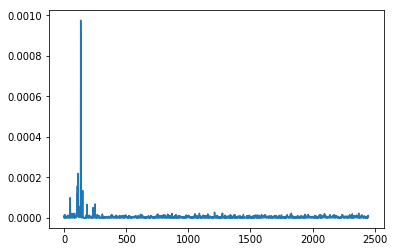

In [55]:
plt.plot(plot_data['x'], np.array(plot_data['data']))

In [ ]:
now = datetime.datetime.now() - datetime.timedelta(seconds=2)

In [ ]:
result_list

In [ ]:
result_list

In [ ]:
from scipy import fftpack

In [ ]:
import numpy as np

In [ ]:
new_stream = vibration.StreamGraph('vibrations', 2)

In [ ]:
es = Elasticsearch(['192.168.20.32:9200'])

In [ ]:
    def query_elastic(self):
        query_body = {"sort": {
            "sensor_1.date": {
                "order": "asc"
            }

                    }
                }
        self.elastic_results = es.search(index=self.index,
                                    doc_type='txt',
                                    size=100,
                                    body=query_body)
        return self.elastic_results

In [ ]:
new_stream.query_elastic = query_elastic

In [ ]:
query = new_stream.query_elastic(new_stream)

In [108]:
x = fftpack.fft(query['hits']['hits'][0]['_source']['sensor_1']['data'][0]['X'])

In [109]:
x

array([ 7.62533411e+06+0.j        ,  1.79017041e-01-0.03204192j,
       -7.33669330e-02+0.02623544j, ..., -8.77566579e-02+0.00539096j,
       -7.33669330e-02-0.02623544j,  1.79017041e-01+0.03204192j])

In [117]:
y_plot = 2.0/N * np.abs(x[0:N//2])

In [118]:
N = len(query['hits']['hits'][0]['_source']['sensor_1']['data'][0]['X'])

In [119]:
from matplotlib import pyplot as plt

In [120]:
x_plot = np.linspace(0.0, 5000, N//2)

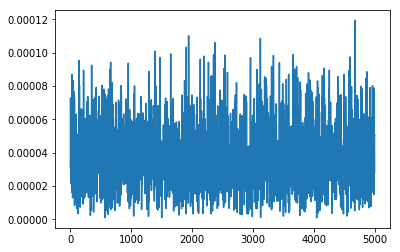

In [121]:
plt.plot(x_plot[1:], y_plot[1:])

In [95]:
x_plot

array([0.00000000e+00, 2.00080032e+00, 4.00160064e+00, ...,
       4.99599840e+03, 4.99799920e+03, 5.00000000e+03])

In [96]:
y_plot

array([3.05013364e+03, 7.27447980e-05, 3.11666616e-05, ...,
       4.95300836e-05, 5.03836046e-05, 5.05637931e-05])

In [37]:
es = Elasticsearch(['192.168.20.32:9200'])

In [123]:
body = {
        "mappings": {
                     "txt": {
                                                     "properties" : {
                                                                     "datetime": { 
                                                                              "type": "date",
                                                                             }
                                                                    }
                                                    }
                                           }

es.indices.create(index='vibrations_fft', ignore=400, body=body)

{'acknowledged': True, 'shards_acknowledged': True, 'index': 'vibrations_fft'}

In [40]:

body = {
        "mappings": {
                     "txt": {
                                                     "properties" : {
                                                                     "datetime": { 
                                                                              "type": "date",
                                                                             }
                                                                    }
                                                    }
                                           }
}
for indice in ['vibrations_testing', 'vibrations_fft']:
    es.indices.delete(index=indice)
    es.indices.create(index=indice, ignore=400, body=body)

In [41]:
len(plot_data['x'])

2450